### Water Quality Parameters Explanatory Data Analysis (EDA) Correlations: 

Here I show multiple different ways of comparing data to analyze before inputting it into a machine learning algorithm. 

In this notebook, the correlation between the four in situ water quality parameters are shown. 

#### Import necessary libraries: 

In [1]:
from __future__ import absolute_import, division, print_function 

import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns # New statistical data visualization library 

#### Import data set: 

In [2]:
dataframe = pd.read_csv("sr_wq_rs_join.csv", header=0)

In [3]:
print(dataframe)

        system:index                  SiteID         blue      blue_sd  \
0                  1                    8348    230.00000    25.890351   
1                  3                    8348    200.00000    23.917018   
2                  4                    8348    543.00000    31.119580   
3                  6                    7889    269.00000    31.265990   
4                  7                    7889    146.00000    18.720043   
5                  8                    7889    369.00000    24.941864   
6                  9                    7889    178.00000    21.693602   
7                 11                    7889    158.00000    17.666516   
8                 12                    7889    258.00000    44.997962   
9                 14                    7889    201.00000    19.816958   
10                15                    7889    149.00000    19.639704   
11                16                    7889    425.00000    23.195953   
12                18                  

In [4]:
dataframe.tail()

,system:index,SiteID,blue,blue_sd,date_unity,green,green_sd,nir,nir_sd,path,...,long,TZID,date_utc,clouds,time,landsat_id,timediff,pwater,type,id
603427,11,USGS-15565447,8266.0,896.663753,2011-03-15T03:50:00Z,8550.0,846.308996,7984.000000,651.276580,78,...,-162.882936,UTC,2011-03-15T03:50:00Z,0.00,2011-03-16T22:03:00Z,LE07_L1TP_078017_20110316_20160913_01_T1,-42.216702,99.0,Stream,New
603428,13,USGS-15565447,4940.5,880.403731,2016-04-05T22:10:00Z,5058.0,834.378816,3540.333333,566.666360,78,...,-162.882936,UTC,2016-04-05T22:10:00Z,47.88,2016-04-06T22:09:04Z,LC08_L1TP_078017_20160406_20170223_01_T1,-23.984557,99.0,Stream,New
603429,16,USGS-15565447,874.0,29.199011,2009-08-18T22:30:00Z,1182.0,24.913294,969.000000,42.492823,78,...,-162.882936,UTC,2009-08-18T22:30:00Z,25.00,2009-08-17T21:59:36Z,LE07_L1TP_078017_20090817_20160917_01_T1,24.506503,99.0,Stream,New
603430,17,USGS-15565447,6449.0,795.585175,2014-04-10T01:10:00Z,6854.0,862.618506,6666.000000,856.343391,78,...,-162.882936,UTC,2014-04-10T01:10:00Z,0.00,2014-04-09T22:06:26Z,LE07_L1TP_078017_20140409_20160906_01_T1,3.059437,99.0,Stream,New
603431,18,USGS-15565447,448.0,27.653250,2018-05-23T12:00:00Z,668.0,27.723633,624.000000,48.881346,78,...,-162.882936,America/Nome,2018-05-23T20:00:00Z,28.00,2018-05-22T22:09:32Z,LE07_L1TP_078017_20180522_20180618_01_T1,21.840960,99.0,Stream,New


In [21]:
dataframe.isna().sum()

system:index         0
SiteID               0
blue                 0
blue_sd           5254
date_unity           0
green                0
green_sd          5254
nir                  0
nir_sd            5254
path                 0
pixelCount           0
qa                   0
qa_sd             5254
red                  0
red_sd            5254
row                  0
sat                  0
swir1                0
swir1_sd          5254
swir2                0
swir2_sd          5254
.geo                 0
endtime              0
date                 0
date_only            0
chl_a           383240
doc             561014
p_sand          602749
secchi          113989
tis             590768
tss             443613
source               0
lat                  0
long                 0
TZID                 0
date_utc             0
clouds               0
time                 0
landsat_id           0
timediff             0
pwater               0
type                 0
id                   0
dtype: int6

In [22]:
d = {}
df = pd.DataFrame(data=d)

In [23]:
df

""


#### Create smaller data set with only the parameters selected: 

In [24]:
df['chl a'] = dataframe['chl_a'] 
df['doc'] = dataframe['doc'] 
df['tis'] = dataframe['tis'] 
df['tss'] = dataframe['tss']  

In [25]:
df

,chl a,doc,tis,tss
0,3.1,7.99,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


#### Drop rows with NaN values: 

In [27]:
df.isna().sum()

chl a    383240
doc      561014
tis      590768
tss      443613
dtype: int64

In [28]:
dataset = df.dropna()

In [29]:
dataset

,chl a,doc,tis,tss
37013,10.50,3.40,13.2,16.1
37014,3.60,3.60,19.0,22.2
37015,19.60,3.40,42.7,49.3
37020,2.51,3.10,88.0,102.0
37021,6.44,3.20,60.6,71.3
37034,3.68,3.40,7.1,9.4
37183,11.80,3.30,7.1,9.4
37184,3.30,4.00,16.9,20.5
37185,15.70,3.60,16.7,20.3
37189,6.67,3.20,42.5,51.1


## Explanatory Data Analysis: 

### Histogram counts showing the total count for certain amounts for each water quality parameter: 

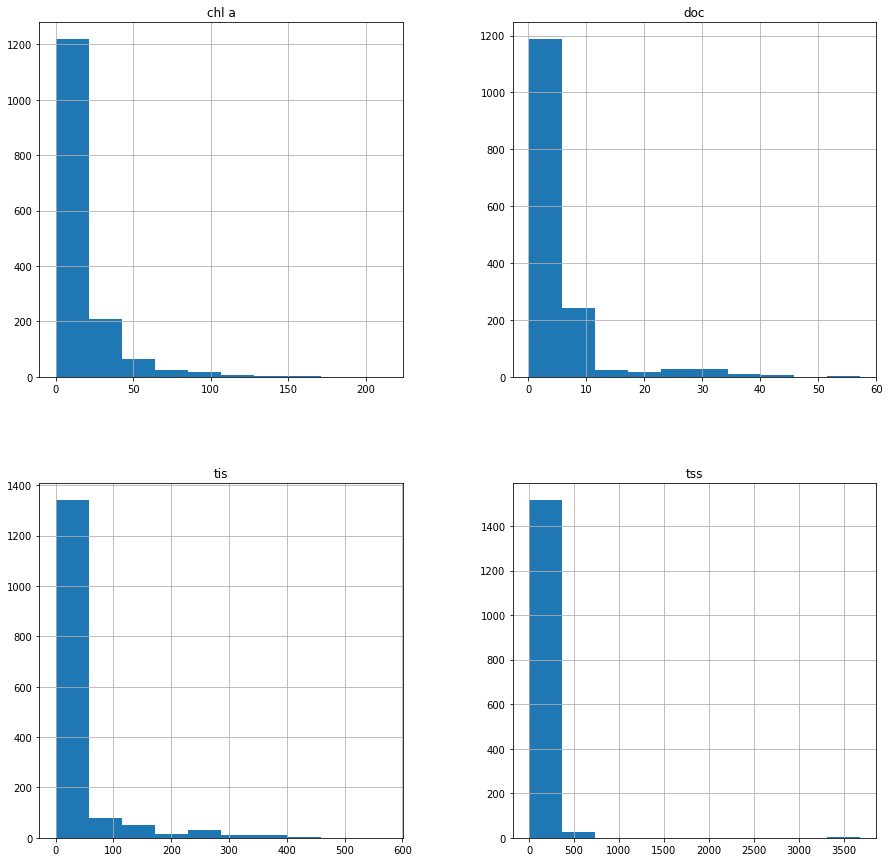

In [30]:
dataset.hist(figsize = (15,15))
plt.show()

### Correlation heat map:  

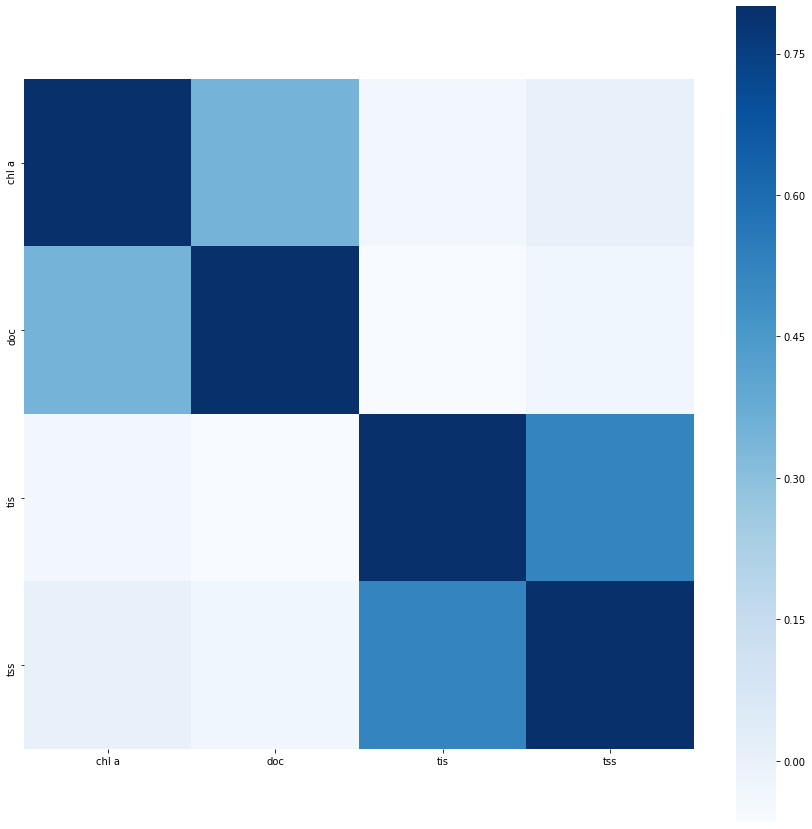

In [31]:
C_mat = dataset.corr()
fig = plt.figure(figsize = (15,15))

sns.heatmap(C_mat, vmax = .8, square = True, cmap="Blues")
plt.show()

### Seaborn Pair Plots:  

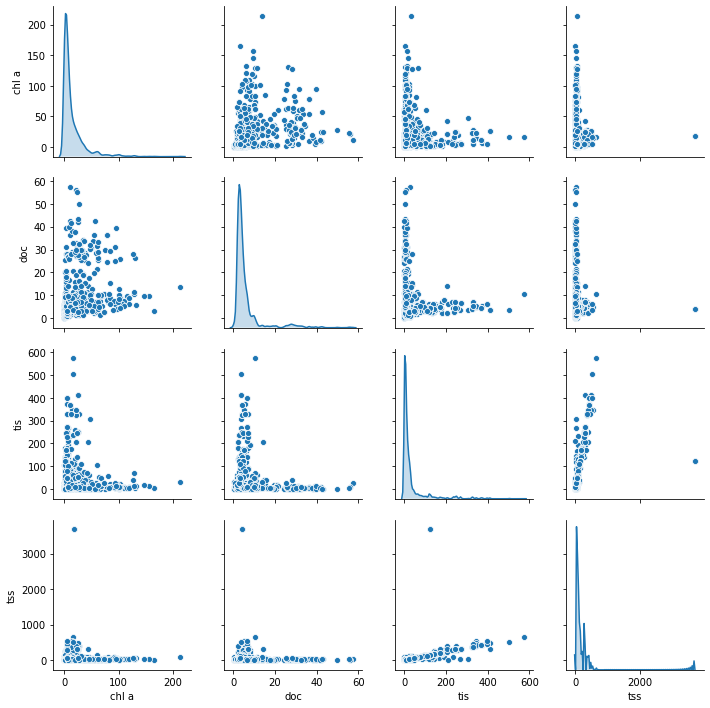

In [32]:
sns.pairplot(dataset, diag_kind="kde") 